In [1]:
import cv2, json
from pprint import pprint
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
TFLITE_MODEL_PATH = r"cat_dog.tflite"
CLASS_JSON = r"finetuning_weights/class_indices.json"
QUERY_IMAGE = "test.jpg"

In [3]:
with open(CLASS_JSON) as f:
    class_indices = json.load(f)

In [ ]:
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

pprint(input_details)
print(os.linesep)
pprint(output_details)

In [5]:
image = tf.image.decode_jpeg(tf.io.read_file(QUERY_IMAGE))
image = tf.image.resize(image, size=(384, 384))
preprocessed_image = tf.keras.applications.imagenet_utils.preprocess_input(image,
                                                                    data_format=None,
                                                                    mode="tf")
preprocessed_image = tf.expand_dims(preprocessed_image, axis = 0)
print("Shape of query image:", preprocessed_image.shape)

Shape of query image: (1, 384, 384, 3)


In [22]:
interpreter.set_tensor(input_details[0]['index'], preprocessed_image)
interpreter.invoke()
softmax_output = interpreter.get_tensor(output_details[0]['index'])
prediction = tf.argmax(softmax_output, axis = -1).numpy()[0]

Predicted: dogs


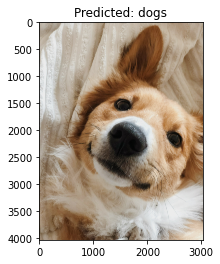

In [31]:
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(QUERY_IMAGE)));
plt.title(f"Predicted: {class_indices[str(prediction)]}");